In [1]:
import os
import numpy as np
import cv2
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2024-01-16 23:47:45.128391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
rootPath = "/Users/maazinzaidi/Dropbox/EME/EC-350 AI and Decision Support Systems/Project/EmotionDataset"
rootDir = os.listdir(rootPath)

In [3]:
if '.DS_Store' in rootDir:
    rootDir.remove('.DS_Store')

In [4]:
print(rootDir)
imageCount = 0
allLabels = []
classes = []

['test', 'train']


LABELS:
0 - happy
1 - sad
2 - fearful
3 - neutral
4 - angry
5 - disgusted
6 - surprised

In [5]:
for i in range(len(rootDir)):
    currentPath = os.path.join(rootPath, rootDir[i])
    currentFolder = os.listdir(currentPath)
    if '.DS_Store' in currentFolder:
        currentFolder.remove('.DS_Store')

    print(rootDir[i])
    print(currentFolder)
    
    for emotion in currentFolder:
        emotionFolder = os.listdir(os.path.join(currentPath, emotion))
        if '.DS_Store' in emotionFolder:
            emotionFolder.remove('.DS_Store')
        
        print(emotion, len(emotionFolder))
        imageCount += len(emotionFolder)
    
    print('\n')

test
['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']
happy 1774
sad 1247
fearful 1024
neutral 1233
angry 958
disgusted 111
surprised 831


train
['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']
happy 7215
sad 4830
fearful 4097
neutral 4965
angry 3995
disgusted 436
surprised 3171




In [6]:
print(imageCount)

35887


In [7]:
allImages = np.zeros((imageCount, 48, 48), dtype=np.uint8)

In [8]:
count = 0
for i in range(len(rootDir)):
    currentPath = os.path.join(rootPath, rootDir[i])
    currentFolder = os.listdir(currentPath)
    if '.DS_Store' in currentFolder:
        currentFolder.remove('.DS_Store')

    for k in range(len(currentFolder)):
        emotionFolder = os.listdir(os.path.join(currentPath, currentFolder[k]))
        if '.DS_Store' in emotionFolder:
            emotionFolder.remove('.DS_Store')
        print(currentFolder[k])
        if currentFolder[k] not in classes:
            classes.append(currentFolder[k])
        for j in range(len(emotionFolder)):
            imagePath = os.path.join(rootPath, rootDir[i], currentPath, currentFolder[k], emotionFolder[j])
            currentImage = cv2.imread(imagePath, -1)
            allImages[count, :, :] = currentImage
            allLabels.append(k)
            count += 1

happy
sad
fearful
neutral
angry
disgusted
surprised
happy
sad
fearful
neutral
angry
disgusted
surprised


In [9]:
print(len(allLabels))
print(classes)

35887
['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']


In [10]:
labels = np.array(allLabels)  # Replace ... with the rest of your labels

# Convert labels to one-hot encoding
oneHotLabels = to_categorical(labels, num_classes=7).astype(int)  # Assuming labels range from 0 to 6

# Print the result
print(oneHotLabels)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


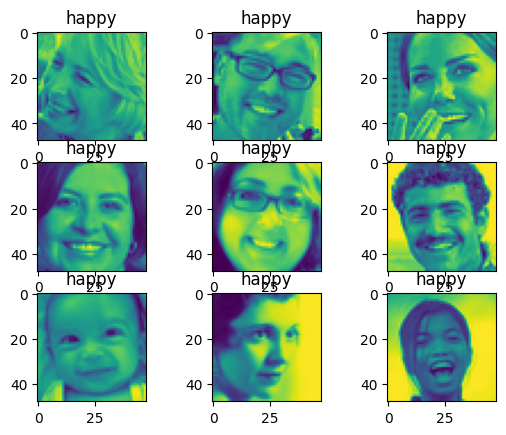

In [11]:
for i in range(9):
  plt.figure(1)
  plt.subplot(3, 3, i+1)
  plt.imshow(allImages[i])
  plt.title(classes[np.argmax(oneHotLabels[i])])


plt.show()

In [12]:
trainingData, X_test, trainingLabels, y_test = train_test_split(allImages, oneHotLabels, test_size=0.3, random_state=1)

validationData, testingData, validationLabels, testingLabels = train_test_split(X_test, y_test, test_size=0.33, random_state=1)

# Print the shapes of the resulting sets
print("Training set shape:", trainingData.shape, trainingLabels.shape)
print("Validation set shape:", validationData.shape, validationLabels.shape)
print("Test set shape:", testingData.shape, testingLabels.shape)


Training set shape: (25120, 48, 48) (25120, 7)
Validation set shape: (7213, 48, 48) (7213, 7)
Test set shape: (3554, 48, 48) (3554, 7)


In [14]:
np.save('trainingData.npy', trainingData)
np.save('trainingLabels.npy', trainingLabels)

# Save testing data and labels
np.save('testingData.npy', testingData)
np.save('testingLabels.npy', testingLabels)

# Save validation data and labels
np.save('validationData.npy', validationData)
np.save('validationLabels.npy', validationLabels)

In [ ]:
for i in range(9):
  plt.figure(1)
  plt.subplot(3, 3, i+1)
  plt.imshow(trainingData[i])
  plt.title(classes[np.argmax(trainingLabels[i])])


plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
myModel = Sequential()

In [ ]:
myModel.add(Conv2D(32, (3, 3), padding='same', activation = 'relu', input_shape=(48, 48, 1)))
myModel.add(BatchNormalization())
myModel.add(MaxPooling2D(pool_size=(2,2)))
myModel.add(Dropout(0.25))

myModel.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
myModel.add(BatchNormalization())
myModel.add(MaxPooling2D(pool_size=(2,2)))
myModel.add(Dropout(0.25))

myModel.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
myModel.add(BatchNormalization())
myModel.add(MaxPooling2D(pool_size=(2,2)))
myModel.add(Dropout(0.25))

myModel.add(Conv2D(256, (3, 3), padding='same', activation = 'relu'))
myModel.add(BatchNormalization())
myModel.add(MaxPooling2D(pool_size=(2,2)))
myModel.add(Dropout(0.25))

myModel.add(Conv2D(512, (3, 3), padding='same', activation = 'relu'))
myModel.add(BatchNormalization())
myModel.add(MaxPooling2D(pool_size=(2,2)))
myModel.add(Dropout(0.25))

myModel.add(Flatten())

myModel.add(Dropout(0.20))
myModel.add(Dropout(0.30))

# myModel.add(GlobalAveragePooling2D())

myModel.add(Dense(512, activation='relu'))
myModel.add(Dense(512, activation='relu'))
# myModel.add(Dense(512, activation='relu'))
myModel.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = Adam(learning_rate=0.0005)
myModel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])

In [ ]:
myModel.build(input_shape=(None, 48, 48, 1))
myModel.summary()

In [ ]:
earlyStoppingCB = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
hist = myModel.fit(trainingData, trainingLabels, 
                   batch_size=40, 
                   epochs=25, 
                   validation_data=(validationData, validationLabels),
                   callbacks=[earlyStoppingCB])

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(range(1, len(hist.history['categorical_accuracy']) + 1))

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(range(1, len(hist.history['loss']) + 1))

plt.show()

In [ ]:
testLoss, testAcc = myModel.evaluate(testingData, testingLabels)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
predictedProbabilities = myModel.predict(testingData)
predictedLabels = np.argmax(predictedProbabilities, axis=1)
testingLabels_indices = np.argmax(testingLabels, axis=1)

In [ ]:
confusionMatrix = confusion_matrix(testingLabels_indices, predictedLabels)
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
disp.plot()
plt.show()

In [ ]:
print(classification_report(testingLabels_indices, predictedLabels, digits=4))

In [ ]:
import pandas as pd

In [ ]:
report = classification_report(testingLabels_indices, predictedLabels, digits=4, output_dict=True)

# Convert the classification report to a DataFrame
df = pd.DataFrame(report).transpose()

# Convert the DataFrame to LaTeX format
latex_table = df.to_latex()

# Save the LaTeX table to a .tex file
with open('/Users/maazinzaidi/Dropbox/EME/EC-350 AI and Decision Support Systems/Project/Report/classificationreport.tex', 'w') as f:
    f.write(latex_table)